In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
products = pd.read_csv('products_cleaned.csv')
sales = pd.read_csv('sales_cleaned.csv')
stores = pd.read_csv('stores_cleaned.csv')
inventory = pd.read_csv('inventory_cleaned.csv')

In [3]:
sales['Date'] = pd.to_datetime(sales['Date'])

## 1- What are the total sales for each month?

In [4]:
merged_data_1 = sales.merge(products, on = 'Product_ID')
merged_data_1

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,2022-01-01,24,4,1,12.99,3.0,Chutes & Ladders,Games,9.99,12.99
1,2,2022-01-01,28,1,1,15.99,6.0,Action Figure,Toys,9.99,15.99
2,3,2022-01-01,6,8,1,6.99,3.0,Deck Of Cards,Games,3.99,6.99
3,4,2022-01-01,48,7,1,15.99,4.0,Dart Gun,Sports & Outdoors,11.99,15.99
4,5,2022-01-01,44,18,1,39.99,5.0,Lego Bricks,Toys,34.99,39.99
...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99
829258,829259,2023-09-30,16,35,1,7.99,4.0,Uno Card Game,Games,3.99,7.99
829259,829260,2023-09-30,22,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99
829260,829261,2023-09-30,13,2,2,25.98,6.0,Animal Figures,Toys,9.99,12.99


In [5]:
# Extract month, and year
merged_data_1['Month'] = merged_data_1['Date'].dt.month
merged_data_1['Year'] = merged_data_1['Date'].dt.year
merged_data_1

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Product_Name,Product_Category,Product_Cost,Product_Price,Month,Year
0,1,2022-01-01,24,4,1,12.99,3.0,Chutes & Ladders,Games,9.99,12.99,1,2022
1,2,2022-01-01,28,1,1,15.99,6.0,Action Figure,Toys,9.99,15.99,1,2022
2,3,2022-01-01,6,8,1,6.99,3.0,Deck Of Cards,Games,3.99,6.99,1,2022
3,4,2022-01-01,48,7,1,15.99,4.0,Dart Gun,Sports & Outdoors,11.99,15.99,1,2022
4,5,2022-01-01,44,18,1,39.99,5.0,Lego Bricks,Toys,34.99,39.99,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99,9,2023
829258,829259,2023-09-30,16,35,1,7.99,4.0,Uno Card Game,Games,3.99,7.99,9,2023
829259,829260,2023-09-30,22,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99,9,2023
829260,829261,2023-09-30,13,2,2,25.98,6.0,Animal Figures,Toys,9.99,12.99,9,2023


In [6]:
# Calculate total revenue for each month
monthly_sales = merged_data_1.groupby("Month")["Revenue"].sum().reset_index().sort_values(by='Month')
monthly_sales

,Month,Revenue
0,1,1289751.13
1,2,1263983.84
2,3,1473000.83
3,4,1508764.05
4,5,1497689.39
5,6,1470279.47
6,7,1384383.09
7,8,1150299.80
8,9,1244038.52
9,10,623874.39


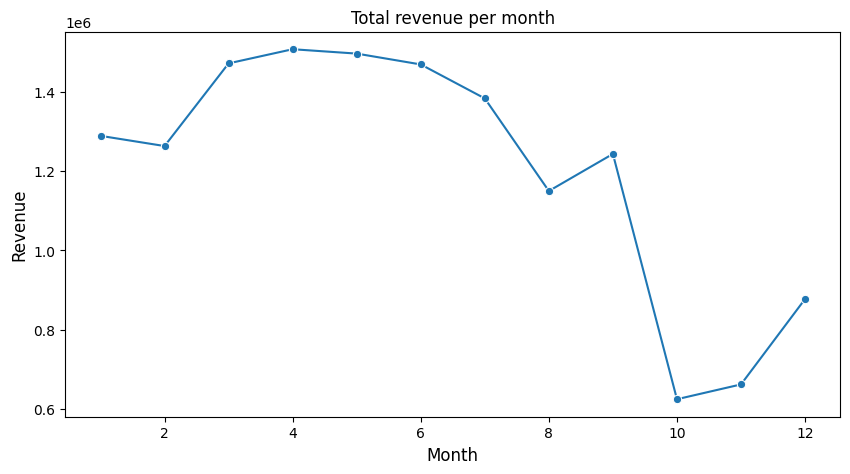

In [7]:
# Add labels and title
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.Month, y=monthly_sales.Revenue, marker="o")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.title("Total revenue per month", fontsize=12)
plt.show()

## 2- How do sales vary across different product categories over time?

In [8]:
merged_data_2 = sales.merge(products,on='Product_ID')
merged_data_2

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,2022-01-01,24,4,1,12.99,3.0,Chutes & Ladders,Games,9.99,12.99
1,2,2022-01-01,28,1,1,15.99,6.0,Action Figure,Toys,9.99,15.99
2,3,2022-01-01,6,8,1,6.99,3.0,Deck Of Cards,Games,3.99,6.99
3,4,2022-01-01,48,7,1,15.99,4.0,Dart Gun,Sports & Outdoors,11.99,15.99
4,5,2022-01-01,44,18,1,39.99,5.0,Lego Bricks,Toys,34.99,39.99
...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99
829258,829259,2023-09-30,16,35,1,7.99,4.0,Uno Card Game,Games,3.99,7.99
829259,829260,2023-09-30,22,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99
829260,829261,2023-09-30,13,2,2,25.98,6.0,Animal Figures,Toys,9.99,12.99


In [9]:
# Extract month
merged_data_2['Month'] = merged_data_2['Date'].dt.month
merged_data_2

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Product_Name,Product_Category,Product_Cost,Product_Price,Month
0,1,2022-01-01,24,4,1,12.99,3.0,Chutes & Ladders,Games,9.99,12.99,1
1,2,2022-01-01,28,1,1,15.99,6.0,Action Figure,Toys,9.99,15.99,1
2,3,2022-01-01,6,8,1,6.99,3.0,Deck Of Cards,Games,3.99,6.99,1
3,4,2022-01-01,48,7,1,15.99,4.0,Dart Gun,Sports & Outdoors,11.99,15.99,1
4,5,2022-01-01,44,18,1,39.99,5.0,Lego Bricks,Toys,34.99,39.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99,9
829258,829259,2023-09-30,16,35,1,7.99,4.0,Uno Card Game,Games,3.99,7.99,9
829259,829260,2023-09-30,22,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99,9
829260,829261,2023-09-30,13,2,2,25.98,6.0,Animal Figures,Toys,9.99,12.99,9


In [10]:
grouped_data = merged_data_2.groupby(['Month', 'Product_Category'])['Revenue'].sum().reset_index().sort_values(['Product_Category', 'Month'])
grouped_data

,Month,Product_Category,Revenue
0,1,Art & Crafts,231002.40
5,2,Art & Crafts,221595.83
10,3,Art & Crafts,257548.84
15,4,Art & Crafts,295643.19
20,5,Art & Crafts,297832.74
25,6,Art & Crafts,265781.78
30,7,Art & Crafts,272514.48
35,8,Art & Crafts,212350.86
40,9,Art & Crafts,255599.53
45,10,Art & Crafts,85597.90


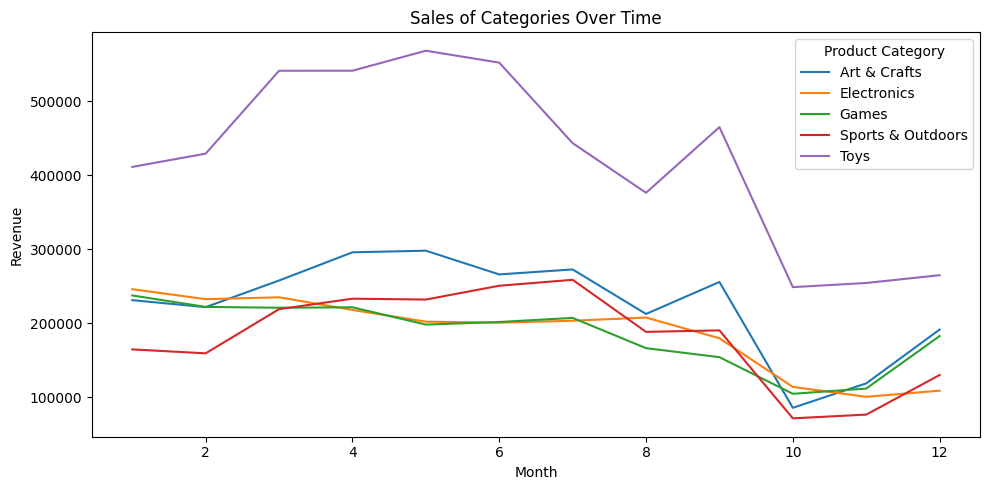

In [11]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_data, x='Month', y='Revenue', hue='Product_Category')

plt.title('Sales of Categories Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Product Category')

plt.tight_layout()
plt.show()

## 3- What are the top 5 best-selling products overall?

In [12]:
merged_data_3 = sales.merge(products, on = 'Product_ID')
merged_data_3

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,2022-01-01,24,4,1,12.99,3.0,Chutes & Ladders,Games,9.99,12.99
1,2,2022-01-01,28,1,1,15.99,6.0,Action Figure,Toys,9.99,15.99
2,3,2022-01-01,6,8,1,6.99,3.0,Deck Of Cards,Games,3.99,6.99
3,4,2022-01-01,48,7,1,15.99,4.0,Dart Gun,Sports & Outdoors,11.99,15.99
4,5,2022-01-01,44,18,1,39.99,5.0,Lego Bricks,Toys,34.99,39.99
...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99
829258,829259,2023-09-30,16,35,1,7.99,4.0,Uno Card Game,Games,3.99,7.99
829259,829260,2023-09-30,22,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99
829260,829261,2023-09-30,13,2,2,25.98,6.0,Animal Figures,Toys,9.99,12.99


In [13]:
top_5_products = merged_data_3.groupby('Product_Name').Units.sum().reset_index().sort_values('Units', ascending=False).head()
top_5_products

,Product_Name,Units
5,Colorbuds,104368
24,PlayDoh Can,103128
2,Barrel O' Slime,91663
7,Deck Of Cards,84034
18,Magic Sand,60598


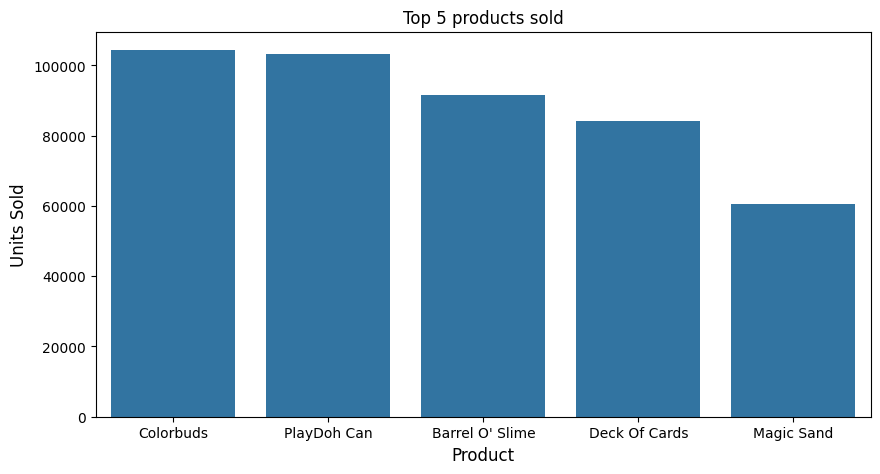

In [14]:
# Add labels and title
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_products["Product_Name"], y=top_5_products["Units"])
plt.xlabel("Product", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.title("Top 5 products sold", fontsize=12)
plt.show()

## 4- Which product had the highest sales in each store?

In [15]:
merged_data_4 = sales.merge(stores, on = 'Store_ID').merge(products, on = 'Product_ID')
merged_data_4

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,2022-01-01,24,4,1,12.99,3.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,9.99,12.99
1,2,2022-01-01,28,1,1,15.99,6.0,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Action Figure,Toys,9.99,15.99
2,3,2022-01-01,6,8,1,6.99,3.0,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,Deck Of Cards,Games,3.99,6.99
3,4,2022-01-01,48,7,1,15.99,4.0,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,Dart Gun,Sports & Outdoors,11.99,15.99
4,5,2022-01-01,44,18,1,39.99,5.0,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,Lego Bricks,Toys,34.99,39.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,15.99,2.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Magic Sand,Art & Crafts,13.99,15.99
829258,829259,2023-09-30,16,35,1,7.99,4.0,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19,Uno Card Game,Games,3.99,7.99
829259,829260,2023-09-30,22,19,1,15.99,2.0,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29,Magic Sand,Art & Crafts,13.99,15.99
829260,829261,2023-09-30,13,2,2,25.98,6.0,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30,Animal Figures,Toys,9.99,12.99


In [16]:
# Group by Store_ID and Product_ID, summing up Units
grouped = merged_data_4.groupby(["Store_ID","Store_Name", "Product_ID", "Product_Name"], as_index=False)["Revenue"].sum()
grouped

,Store_ID,Store_Name,Product_ID,Product_Name,Revenue
0,1,Maven Toys Guadalajara 1,1,Action Figure,20179.38
1,1,Maven Toys Guadalajara 1,2,Animal Figures,8222.67
2,1,Maven Toys Guadalajara 1,3,Barrel O' Slime,6655.32
3,1,Maven Toys Guadalajara 1,4,Chutes & Ladders,1013.22
4,1,Maven Toys Guadalajara 1,5,Classic Dominoes,2237.76
...,...,...,...,...,...
1626,50,Maven Toys Guanajuato 3,31,Splash Balls,11372.35
1627,50,Maven Toys Guanajuato 3,32,Supersoaker Water Gun,2698.20
1628,50,Maven Toys Guanajuato 3,33,Teddy Bear,1428.90
1629,50,Maven Toys Guanajuato 3,34,Toy Robot,4132.41


In [17]:
# Find the product with the highest sales in each store
max_sales = grouped.loc[grouped.groupby(["Store_ID", 'Store_Name'])["Revenue"].idxmax()].reset_index(drop=True)
max_sales

,Store_ID,Store_Name,Product_ID,Product_Name,Revenue
0,1,Maven Toys Guadalajara 1,18,Lego Bricks,36550.86
1,2,Maven Toys Monterrey 1,18,Lego Bricks,66423.39
2,3,Maven Toys Guadalajara 2,6,Colorbuds,39408.71
3,4,Maven Toys Saltillo 1,18,Lego Bricks,68022.99
4,5,Maven Toys La Paz 1,18,Lego Bricks,35511.12
5,6,Maven Toys Mexicali 1,6,Colorbuds,73660.86
6,7,Maven Toys Monterrey 2,18,Lego Bricks,66623.34
7,8,Maven Toys Pachuca 1,19,Magic Sand,22417.98
8,9,Maven Toys Ciudad de Mexico 1,18,Lego Bricks,79300.17
9,10,Maven Toys Campeche 1,21,Mini Ping Pong Set,42397.56


## 5- Which store has the highest overall sales?

In [18]:
merged_data_5 = sales.merge(stores, on = 'Store_ID').merge(products, on = 'Product_ID')
merged_data_5

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,2022-01-01,24,4,1,12.99,3.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,9.99,12.99
1,2,2022-01-01,28,1,1,15.99,6.0,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Action Figure,Toys,9.99,15.99
2,3,2022-01-01,6,8,1,6.99,3.0,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,Deck Of Cards,Games,3.99,6.99
3,4,2022-01-01,48,7,1,15.99,4.0,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,Dart Gun,Sports & Outdoors,11.99,15.99
4,5,2022-01-01,44,18,1,39.99,5.0,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,Lego Bricks,Toys,34.99,39.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,15.99,2.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Magic Sand,Art & Crafts,13.99,15.99
829258,829259,2023-09-30,16,35,1,7.99,4.0,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19,Uno Card Game,Games,3.99,7.99
829259,829260,2023-09-30,22,19,1,15.99,2.0,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29,Magic Sand,Art & Crafts,13.99,15.99
829260,829261,2023-09-30,13,2,2,25.98,6.0,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30,Animal Figures,Toys,9.99,12.99


In [19]:
merged_data = merged_data_5.groupby(['Store_ID', 'Store_Name']).Revenue.sum().reset_index().sort_values('Revenue', ascending=False).head(10)
merged_data

,Store_ID,Store_Name,Revenue
30,31,Maven Toys Ciudad de Mexico 2,554553.43
29,30,Maven Toys Guadalajara 3,449354.91
8,9,Maven Toys Ciudad de Mexico 1,433556.21
16,17,Maven Toys Toluca 1,411157.32
6,7,Maven Toys Monterrey 2,372998.82
45,46,Maven Toys Guadalajara 4,348466.64
41,42,Maven Toys Hermosillo 3,344846.64
38,39,Maven Toys Xalapa 2,344307.04
36,37,Maven Toys Ciudad de Mexico 3,337424.66
3,4,Maven Toys Saltillo 1,330408.90


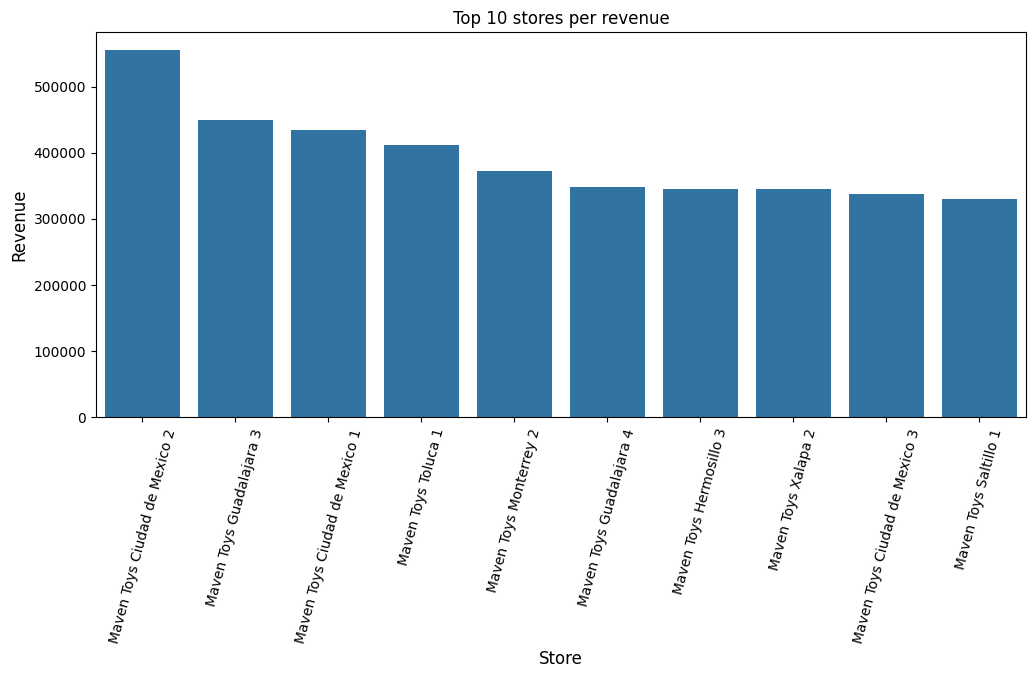

In [20]:
# Add labels and title
plt.figure(figsize=(12, 5))
sns.barplot(x=merged_data["Store_Name"], y=merged_data["Revenue"])
plt.xlabel("Store", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=75)
plt.title("Top 10 stores per revenue", fontsize=12)
plt.show()

## 6- What is the average number of units sold per sale in each store?

In [21]:
merged_data_6 = sales.merge(stores, on = 'Store_ID')
merged_data_6

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,2022-01-01,24,4,1,12.99,3.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
1,2,2022-01-01,28,1,1,15.99,6.0,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
2,3,2022-01-01,6,8,1,6.99,3.0,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13
3,4,2022-01-01,48,7,1,15.99,4.0,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23
4,5,2022-01-01,44,18,1,39.99,5.0,Maven Toys Puebla 3,Puebla,Residential,2014-12-27
...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,15.99,2.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
829258,829259,2023-09-30,16,35,1,7.99,4.0,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19
829259,829260,2023-09-30,22,19,1,15.99,2.0,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29
829260,829261,2023-09-30,13,2,2,25.98,6.0,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30


In [22]:
grouped_data = merged_data_6.groupby('Store_Name').Units.mean().reset_index()
grouped_data

,Store_Name,Units
0,Maven Toys Aguascalientes 1,1.224637
1,Maven Toys Campeche 1,1.387737
2,Maven Toys Campeche 2,1.271144
3,Maven Toys Chetumal 1,1.295070
4,Maven Toys Chihuahua 1,1.290899
5,Maven Toys Chihuahua 2,1.346562
6,Maven Toys Chilpancingo 1,1.255962
7,Maven Toys Ciudad Victoria 1,1.278595
8,Maven Toys Ciudad de Mexico 1,1.367494
9,Maven Toys Ciudad de Mexico 2,1.473160


## 7- How does the average sale price vary between stores?

In [23]:
merged_data_7 = sales.merge(stores, on = 'Store_ID').merge(products, on = 'Product_ID')
merged_data_7

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,2022-01-01,24,4,1,12.99,3.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,9.99,12.99
1,2,2022-01-01,28,1,1,15.99,6.0,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,Action Figure,Toys,9.99,15.99
2,3,2022-01-01,6,8,1,6.99,3.0,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,Deck Of Cards,Games,3.99,6.99
3,4,2022-01-01,48,7,1,15.99,4.0,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,Dart Gun,Sports & Outdoors,11.99,15.99
4,5,2022-01-01,44,18,1,39.99,5.0,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,Lego Bricks,Toys,34.99,39.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,15.99,2.0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Magic Sand,Art & Crafts,13.99,15.99
829258,829259,2023-09-30,16,35,1,7.99,4.0,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19,Uno Card Game,Games,3.99,7.99
829259,829260,2023-09-30,22,19,1,15.99,2.0,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29,Magic Sand,Art & Crafts,13.99,15.99
829260,829261,2023-09-30,13,2,2,25.98,6.0,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30,Animal Figures,Toys,9.99,12.99


In [24]:
# Group by Store_ID and Store_Name and calculate average sale price
store_avg_price = merged_data_7.groupby(["Store_ID", 'Store_Name']).Revenue.mean().reset_index(name="Avg_Sale_Price") 
store_avg_price

,Store_ID,Store_Name,Avg_Sale_Price
0,1,Maven Toys Guadalajara 1,16.441221
1,2,Maven Toys Monterrey 1,17.706659
2,3,Maven Toys Guadalajara 2,16.069746
3,4,Maven Toys Saltillo 1,17.459781
4,5,Maven Toys La Paz 1,15.956558
5,6,Maven Toys Mexicali 1,17.434738
6,7,Maven Toys Monterrey 2,17.511682
7,8,Maven Toys Pachuca 1,15.877891
8,9,Maven Toys Ciudad de Mexico 1,17.709183
9,10,Maven Toys Campeche 1,17.620031


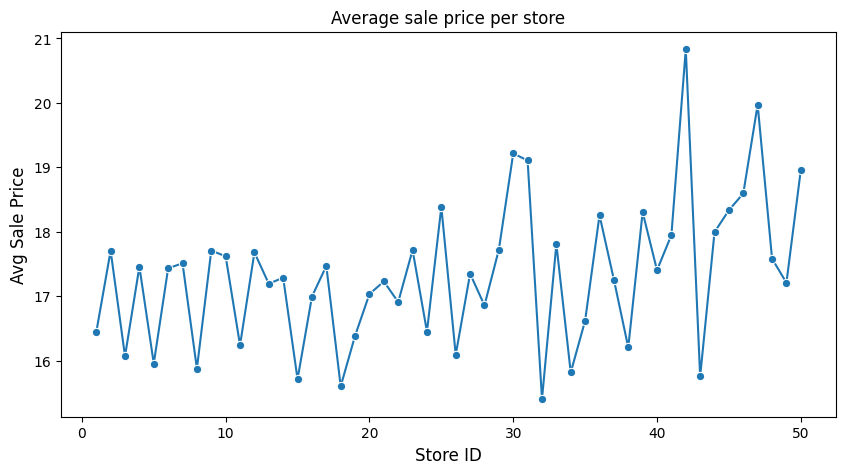

In [25]:
# Add labels and title
plt.figure(figsize=(10, 5))
sns.lineplot(x=store_avg_price["Store_ID"], y=store_avg_price["Avg_Sale_Price"], marker="o")
plt.xlabel("Store ID", fontsize=12)
plt.ylabel("Avg Sale Price", fontsize=12)
plt.title("Average sale price per store", fontsize=12)
plt.show()

## 8- Which products have the highest and lowest stock levels currently?

In [26]:
merged_data_8 = inventory.merge(products, on = 'Product_ID')
merged_data_8

,Store_ID,Product_ID,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,1,27,Action Figure,Toys,9.99,15.99
1,1,2,0,Animal Figures,Toys,9.99,12.99
2,1,3,32,Barrel O' Slime,Art & Crafts,1.99,3.99
3,1,4,6,Chutes & Ladders,Games,9.99,12.99
4,1,5,0,Classic Dominoes,Games,7.99,9.99
...,...,...,...,...,...,...,...
1588,50,31,18,Splash Balls,Sports & Outdoors,7.99,8.99
1589,50,32,9,Supersoaker Water Gun,Sports & Outdoors,11.99,14.99
1590,50,33,1,Teddy Bear,Toys,10.99,12.99
1591,50,34,17,Toy Robot,Electronics,20.99,25.99


In [27]:
grouped_data = merged_data_8.groupby(['Product_ID', 'Product_Name']).Stock_On_Hand.sum().reset_index().sort_values('Stock_On_Hand', ascending=False)
grouped_data

,Product_ID,Product_Name,Stock_On_Hand
7,8,Deck Of Cards,2738
9,10,Dinosaur Figures,2272
24,25,PlayDoh Can,2129
18,19,Magic Sand,1922
29,30,Rubik's Cube,1497
26,27,PlayDoh Toolkit,1387
2,3,Barrel O' Slime,1282
23,24,Nerf Gun,1212
5,6,Colorbuds,1159
17,18,Lego Bricks,1118


In [28]:
top_5_products = grouped_data.head()
less_5_products = grouped_data.tail()

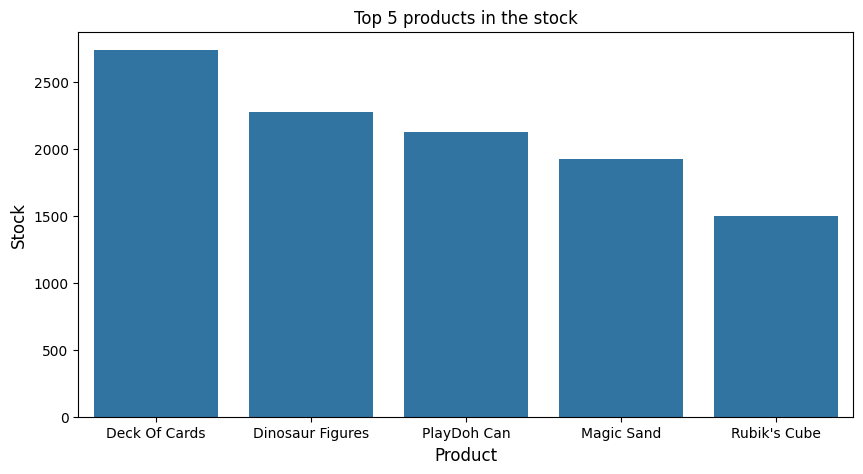

In [29]:
# Add labels and title
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_products["Product_Name"], y=top_5_products["Stock_On_Hand"])
plt.xlabel("Product", fontsize=12)
plt.ylabel("Stock", fontsize=12)
plt.title("Top 5 products in the stock", fontsize=12)
plt.show()

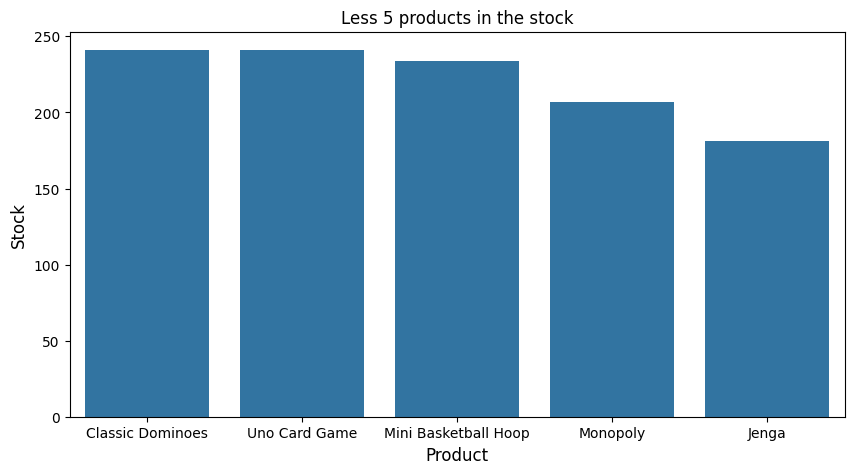

In [30]:
# Add labels and title
plt.figure(figsize=(10, 5))
sns.barplot(x=less_5_products["Product_Name"], y=less_5_products["Stock_On_Hand"])
plt.xlabel("Product", fontsize=12)
plt.ylabel("Stock", fontsize=12)
plt.title("Less 5 products in the stock", fontsize=12)
plt.show()

## 9- Are there any products that are out of stock in any of the stores?

In [31]:
merged_data_9 = inventory.merge(stores, on = 'Store_ID').merge(products, on = 'Product_ID')
merged_data_9

,Store_ID,Product_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,1,27,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,Action Figure,Toys,9.99,15.99
1,1,2,0,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,Animal Figures,Toys,9.99,12.99
2,1,3,32,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,Barrel O' Slime,Art & Crafts,1.99,3.99
3,1,4,6,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,Chutes & Ladders,Games,9.99,12.99
4,1,5,0,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,Classic Dominoes,Games,7.99,9.99
...,...,...,...,...,...,...,...,...,...,...,...
1588,50,31,18,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18,Splash Balls,Sports & Outdoors,7.99,8.99
1589,50,32,9,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18,Supersoaker Water Gun,Sports & Outdoors,11.99,14.99
1590,50,33,1,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18,Teddy Bear,Toys,10.99,12.99
1591,50,34,17,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18,Toy Robot,Electronics,20.99,25.99


In [32]:
grouped_data = merged_data_9.groupby(['Store_Name', 'Product_Name']).Stock_On_Hand.sum().reset_index()
grouped_data

,Store_Name,Product_Name,Stock_On_Hand
0,Maven Toys Aguascalientes 1,Action Figure,11
1,Maven Toys Aguascalientes 1,Animal Figures,25
2,Maven Toys Aguascalientes 1,Barrel O' Slime,13
3,Maven Toys Aguascalientes 1,Chutes & Ladders,1
4,Maven Toys Aguascalientes 1,Classic Dominoes,4
...,...,...,...
1588,Maven Toys Zacatecas 1,Rubik's Cube,17
1589,Maven Toys Zacatecas 1,Splash Balls,10
1590,Maven Toys Zacatecas 1,Supersoaker Water Gun,9
1591,Maven Toys Zacatecas 1,Teddy Bear,28


In [33]:
zero_stocks = grouped_data[grouped_data.Stock_On_Hand == 0].sort_values(['Store_Name', 'Product_Name'])
zero_stocks

,Store_Name,Product_Name,Stock_On_Hand
11,Maven Toys Aguascalientes 1,Foam Disk Launcher,0
14,Maven Toys Aguascalientes 1,Hot Wheels 5-Pack,0
20,Maven Toys Aguascalientes 1,Mini Ping Pong Set,0
27,Maven Toys Aguascalientes 1,Playfoam,0
186,Maven Toys Chihuahua 2,Foam Disk Launcher,0
...,...,...,...
1479,Maven Toys Villahermosa 1,Dino Egg,0
1535,Maven Toys Xalapa 2,Action Figure,0
1547,Maven Toys Xalapa 2,Hot Wheels 5-Pack,0
1557,Maven Toys Xalapa 2,Playfoam,0


## 10- What is the average stock level for each product category?

In [34]:
merged_data_10 = inventory.merge(products, on = 'Product_ID')
merged_data_10

,Store_ID,Product_ID,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,1,27,Action Figure,Toys,9.99,15.99
1,1,2,0,Animal Figures,Toys,9.99,12.99
2,1,3,32,Barrel O' Slime,Art & Crafts,1.99,3.99
3,1,4,6,Chutes & Ladders,Games,9.99,12.99
4,1,5,0,Classic Dominoes,Games,7.99,9.99
...,...,...,...,...,...,...,...
1588,50,31,18,Splash Balls,Sports & Outdoors,7.99,8.99
1589,50,32,9,Supersoaker Water Gun,Sports & Outdoors,11.99,14.99
1590,50,33,1,Teddy Bear,Toys,10.99,12.99
1591,50,34,17,Toy Robot,Electronics,20.99,25.99


In [35]:
# Group by Product_Category and calculate the average stock level
avg_stock_level = merged_data_10.groupby("Product_Category")["Stock_On_Hand"].mean().reset_index(name="Avg_Stock_Level").sort_values('Avg_Stock_Level')
avg_stock_level

,Product_Category,Avg_Stock_Level
3,Sports & Outdoors,15.421053
1,Electronics,16.228188
4,Toys,16.897092
0,Art & Crafts,21.750630
2,Games,22.220217


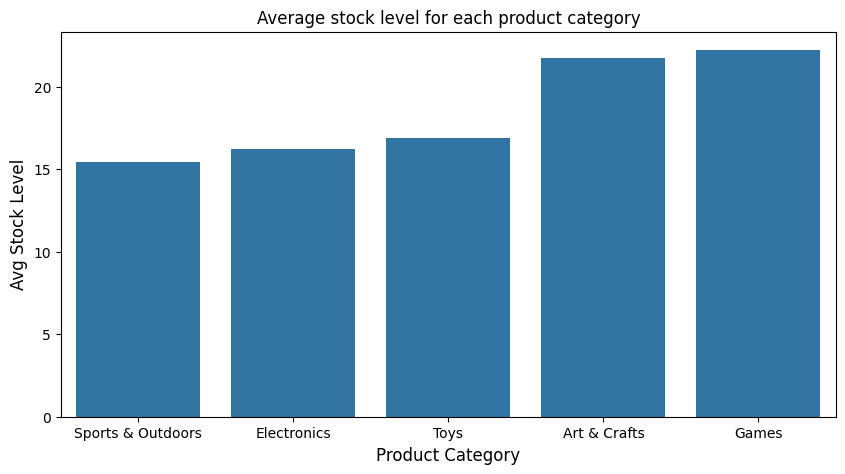

In [36]:
# Add labels and title
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_stock_level["Product_Category"], y=avg_stock_level["Avg_Stock_Level"])
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Avg Stock Level", fontsize=12)
plt.title("Average stock level for each product category", fontsize=12)
plt.show()

## 11- Do products with higher stock levels tend to sell more?

In [37]:
merged_data_11 = sales.merge(products, on = 'Product_ID').groupby(['Product_ID', 'Product_Name']).Units.sum().reset_index()
inventory_grouped = inventory.groupby('Product_ID').Stock_On_Hand.sum().reset_index()

In [38]:
merged_data_11 = merged_data_11.merge(inventory_grouped, on='Product_ID').sort_values(by='Stock_On_Hand', ascending=False)
merged_data_11

,Product_ID,Product_Name,Units,Stock_On_Hand
7,8,Deck Of Cards,84034,2738
9,10,Dinosaur Figures,29012,2272
24,25,PlayDoh Can,103128,2129
18,19,Magic Sand,60598,1922
29,30,Rubik's Cube,45672,1497
26,27,PlayDoh Toolkit,23128,1387
2,3,Barrel O' Slime,91663,1282
23,24,Nerf Gun,26543,1212
5,6,Colorbuds,104368,1159
17,18,Lego Bricks,59737,1118


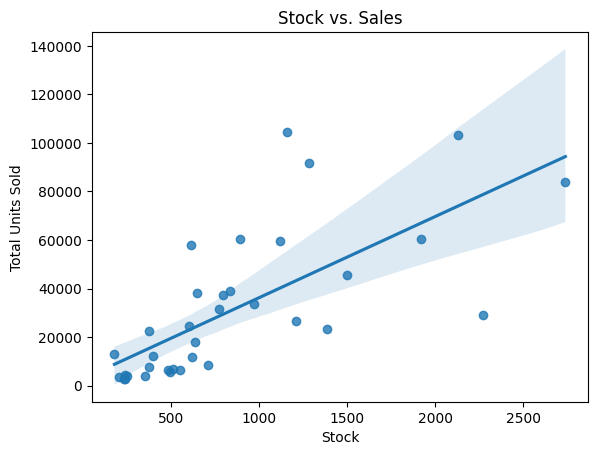

In [39]:
sns.regplot(data=merged_data_11, x=merged_data_11['Stock_On_Hand'], y=merged_data_11['Units'])
plt.xlabel("Stock")
plt.ylabel("Total Units Sold")
plt.title("Stock vs. Sales")
plt.show()

#### It indicates that products with higher stock on hand generally sell more units, though there are likely other factors influencing sales. Products with low stock on hand tend to sell fewer units

## 12- Which products have the highest sales during Black Friday?

In [40]:
merged_data_12 = sales.merge(products, on='Product_ID')
merged_data_12

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,2022-01-01,24,4,1,12.99,3.0,Chutes & Ladders,Games,9.99,12.99
1,2,2022-01-01,28,1,1,15.99,6.0,Action Figure,Toys,9.99,15.99
2,3,2022-01-01,6,8,1,6.99,3.0,Deck Of Cards,Games,3.99,6.99
3,4,2022-01-01,48,7,1,15.99,4.0,Dart Gun,Sports & Outdoors,11.99,15.99
4,5,2022-01-01,44,18,1,39.99,5.0,Lego Bricks,Toys,34.99,39.99
...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99
829258,829259,2023-09-30,16,35,1,7.99,4.0,Uno Card Game,Games,3.99,7.99
829259,829260,2023-09-30,22,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99
829260,829261,2023-09-30,13,2,2,25.98,6.0,Animal Figures,Toys,9.99,12.99


In [41]:
sales_events_dates = pd.to_datetime(['2022-11-25', '2023-11-24'])
merged_data_12_date_data = merged_data_12[merged_data_12['Date'].dt.floor('D').isin(sales_events_dates)]
merged_data_12_date_data

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Product_Name,Product_Category,Product_Cost,Product_Price
364882,364883,2022-11-25,41,17,1,19.99,6.0,Kids Makeup Kit,Art & Crafts,13.99,19.99
364883,364884,2022-11-25,36,8,1,6.99,3.0,Deck Of Cards,Games,3.99,6.99
364884,364885,2022-11-25,31,3,1,3.99,2.0,Barrel O' Slime,Art & Crafts,1.99,3.99
364885,364886,2022-11-25,45,15,1,5.99,2.0,Hot Wheels 5-Pack,Toys,3.99,5.99
364886,364887,2022-11-25,9,21,1,9.99,3.0,Mini Ping Pong Set,Sports & Outdoors,6.99,9.99
...,...,...,...,...,...,...,...,...,...,...,...
366916,366917,2022-11-25,25,6,1,14.99,8.0,Colorbuds,Electronics,6.99,14.99
366917,366918,2022-11-25,36,8,1,6.99,3.0,Deck Of Cards,Games,3.99,6.99
366918,366919,2022-11-25,2,14,1,10.99,5.0,Glass Marbles,Games,5.99,10.99
366919,366920,2022-11-25,45,21,1,9.99,3.0,Mini Ping Pong Set,Sports & Outdoors,6.99,9.99


In [42]:
top_5_products = merged_data_12_date_data.groupby(['Product_ID', 'Product_Name']).Revenue.sum().reset_index().sort_values('Revenue', ascending=False).head()
top_5_products

,Product_ID,Product_Name,Revenue
13,18,Lego Bricks,5598.60
12,17,Kids Makeup Kit,2258.87
0,1,Action Figure,2078.70
24,30,Rubik's Cube,1859.07
3,6,Colorbuds,1858.76


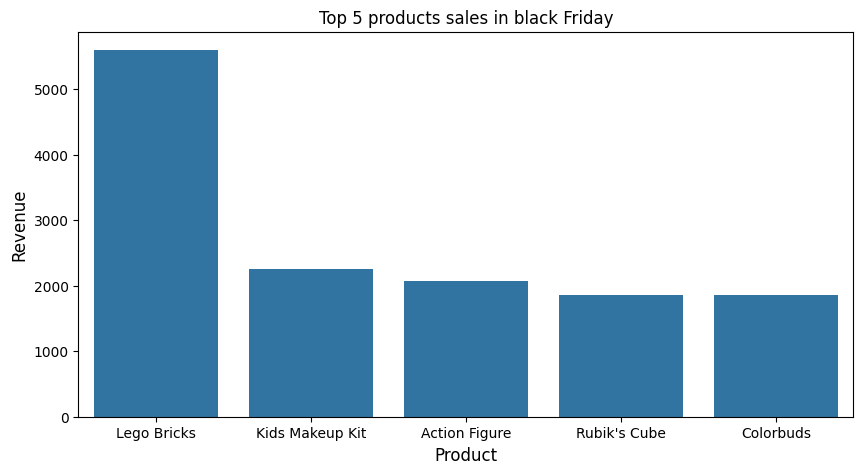

In [43]:
# Add labels and title
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_products["Product_Name"], y=top_5_products["Revenue"])
plt.xlabel("Product", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.title("Top 5 products sales in black Friday", fontsize=12)
plt.show()

## 13- Which stores generated the highest total revenue during summer?

In [54]:
merged_data_13 = sales.merge(products, on='Product_ID').merge(stores, on = 'Store_ID')
merged_data_13

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,2022-01-01,24,4,1,12.99,3.0,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
1,2,2022-01-01,28,1,1,15.99,6.0,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
2,3,2022-01-01,6,8,1,6.99,3.0,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13
3,4,2022-01-01,48,7,1,15.99,4.0,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23
4,5,2022-01-01,44,18,1,39.99,5.0,Lego Bricks,Toys,34.99,39.99,Maven Toys Puebla 3,Puebla,Residential,2014-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
829258,829259,2023-09-30,16,35,1,7.99,4.0,Uno Card Game,Games,3.99,7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19
829259,829260,2023-09-30,22,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29
829260,829261,2023-09-30,13,2,2,25.98,6.0,Animal Figures,Toys,9.99,12.99,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30


In [55]:
# Filter for summer months
holiday = merged_data_13[merged_data_13['Date'].dt.month.isin([6, 7, 8])]
holiday

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
162354,162355,2022-06-01,11,6,1,14.99,8.0,Colorbuds,Electronics,6.99,14.99,Maven Toys Cuernavaca 1,Cuernavaca,Downtown,2005-04-19
162355,162356,2022-06-01,26,6,1,14.99,8.0,Colorbuds,Electronics,6.99,14.99,Maven Toys Campeche 2,Campeche,Commercial,2010-09-15
162356,162357,2022-06-01,34,7,1,15.99,4.0,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Villahermosa 1,Villahermosa,Downtown,2013-06-07
162357,162358,2022-06-01,41,8,1,6.99,3.0,Deck Of Cards,Games,3.99,6.99,Maven Toys Hermosillo 2,Hermosillo,Downtown,2014-06-01
162358,162359,2022-06-01,23,7,1,15.99,4.0,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Chihuahua 1,Chihuahua,Commercial,2010-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787427,787428,2023-08-31,49,28,1,10.99,7.0,Playfoam,Art & Crafts,3.99,10.99,Maven Toys Culiacan 1,Culiacan,Downtown,2016-05-10
787428,787429,2023-08-31,18,13,1,20.99,6.0,Gamer Headphones,Electronics,14.99,20.99,Maven Toys Merida 1,Merida,Downtown,2008-08-22
787429,787430,2023-08-31,2,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
787430,787431,2023-08-31,7,25,1,2.99,1.0,PlayDoh Can,Art & Crafts,1.99,2.99,Maven Toys Monterrey 2,Monterrey,Downtown,2003-12-25


In [56]:
# Group by 'Store_ID' and calculate the total revenue during summer
store_revenue = holiday.groupby('Store_Name')['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False).head()
store_revenue

,Store_Name,Revenue
9,Maven Toys Ciudad de Mexico 2,171346.73
17,Maven Toys Guadalajara 3,138548.55
43,Maven Toys Toluca 1,116820.58
32,Maven Toys Monterrey 4,110849.30
8,Maven Toys Ciudad de Mexico 1,104853.55


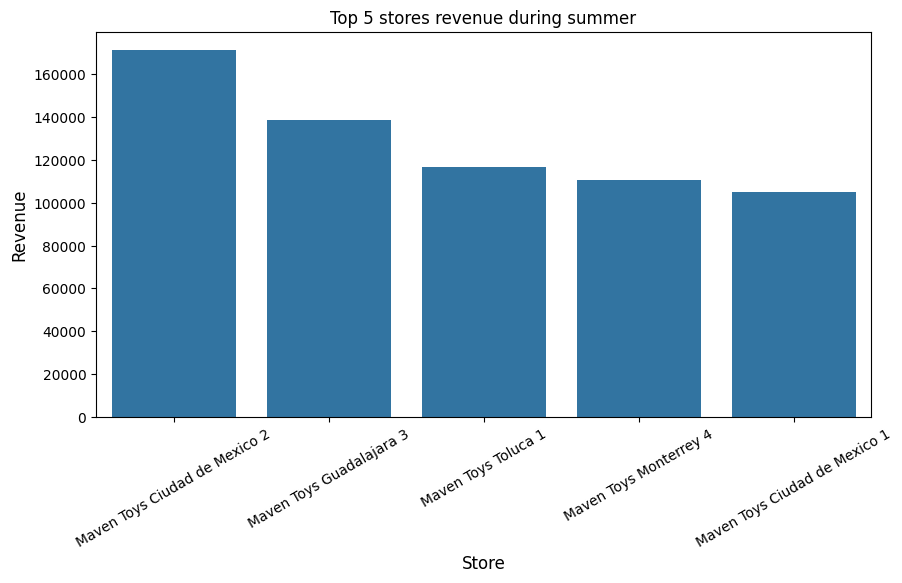

In [62]:
# Add labels and title
plt.figure(figsize=(10, 5))
sns.barplot(x=store_revenue["Store_Name"], y=store_revenue["Revenue"])
plt.xlabel("Store", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=30)
plt.title("Top 5 stores revenue during summer", fontsize=12)
plt.show()

## 14- How does the sales performance of each product category change over different quarters?

In [48]:
merged_data_14 = sales.merge(products, on='Product_ID')
merged_data_14

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,2022-01-01,24,4,1,12.99,3.0,Chutes & Ladders,Games,9.99,12.99
1,2,2022-01-01,28,1,1,15.99,6.0,Action Figure,Toys,9.99,15.99
2,3,2022-01-01,6,8,1,6.99,3.0,Deck Of Cards,Games,3.99,6.99
3,4,2022-01-01,48,7,1,15.99,4.0,Dart Gun,Sports & Outdoors,11.99,15.99
4,5,2022-01-01,44,18,1,39.99,5.0,Lego Bricks,Toys,34.99,39.99
...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99
829258,829259,2023-09-30,16,35,1,7.99,4.0,Uno Card Game,Games,3.99,7.99
829259,829260,2023-09-30,22,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99
829260,829261,2023-09-30,13,2,2,25.98,6.0,Animal Figures,Toys,9.99,12.99


In [49]:
# Extract month, and year
merged_data_14['Quarter'] = merged_data_14['Date'].dt.quarter
merged_data_14['Year'] = merged_data_14['Date'].dt.year
merged_data_14

,Sale_ID,Date,Store_ID,Product_ID,Units,Revenue,Profit,Product_Name,Product_Category,Product_Cost,Product_Price,Quarter,Year
0,1,2022-01-01,24,4,1,12.99,3.0,Chutes & Ladders,Games,9.99,12.99,1,2022
1,2,2022-01-01,28,1,1,15.99,6.0,Action Figure,Toys,9.99,15.99,1,2022
2,3,2022-01-01,6,8,1,6.99,3.0,Deck Of Cards,Games,3.99,6.99,1,2022
3,4,2022-01-01,48,7,1,15.99,4.0,Dart Gun,Sports & Outdoors,11.99,15.99,1,2022
4,5,2022-01-01,44,18,1,39.99,5.0,Lego Bricks,Toys,34.99,39.99,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99,3,2023
829258,829259,2023-09-30,16,35,1,7.99,4.0,Uno Card Game,Games,3.99,7.99,3,2023
829259,829260,2023-09-30,22,19,1,15.99,2.0,Magic Sand,Art & Crafts,13.99,15.99,3,2023
829260,829261,2023-09-30,13,2,2,25.98,6.0,Animal Figures,Toys,9.99,12.99,3,2023


In [50]:
grouped_data = merged_data_14.groupby(['Product_Category', 'Quarter', 'Year']).Revenue.sum().reset_index().sort_values(by=['Product_Category', 'Year', 'Quarter'])
grouped_data

,Product_Category,Quarter,Year,Revenue
0,Art & Crafts,1,2022,120680.62
2,Art & Crafts,2,2022,199389.03
4,Art & Crafts,3,2022,191076.62
6,Art & Crafts,4,2022,395494.61
1,Art & Crafts,1,2023,589466.45
3,Art & Crafts,2,2023,659868.68
5,Art & Crafts,3,2023,549388.25
7,Electronics,1,2022,410226.36
9,Electronics,2,2022,362717.63
11,Electronics,3,2022,344533.74


In [51]:
grouped_data['Time'] = grouped_data['Year'].astype(str) + ' ' + 'Q' + grouped_data['Quarter'].astype(str)
grouped_data

,Product_Category,Quarter,Year,Revenue,Time
0,Art & Crafts,1,2022,120680.62,2022 Q1
2,Art & Crafts,2,2022,199389.03,2022 Q2
4,Art & Crafts,3,2022,191076.62,2022 Q3
6,Art & Crafts,4,2022,395494.61,2022 Q4
1,Art & Crafts,1,2023,589466.45,2023 Q1
3,Art & Crafts,2,2023,659868.68,2023 Q2
5,Art & Crafts,3,2023,549388.25,2023 Q3
7,Electronics,1,2022,410226.36,2022 Q1
9,Electronics,2,2022,362717.63,2022 Q2
11,Electronics,3,2022,344533.74,2022 Q3


In [52]:
## Pivot the table to be able to draw it
pivot_df = grouped_data.pivot_table(index='Time', columns='Product_Category', values='Revenue')
pivot_df

Product_Category,Art & Crafts,Electronics,Games,Sports & Outdoors,Toys
Time,,,,,
2022 Q1,120680.62,410226.36,277249.55,225028.93,640206.29
2022 Q2,199389.03,362717.63,291675.42,319060.56,842580.46
2022 Q3,191076.62,344533.74,261031.71,297675.69,536983.24
2022 Q4,395494.61,322981.46,398686.91,277662.69,767556.56
2023 Q1,589466.45,302886.16,402806.81,317499.61,740685.02
2023 Q2,659868.68,257682.69,329204.94,396273.79,818279.71
2023 Q3,549388.25,245743.21,266180.93,339158.30,746949.72


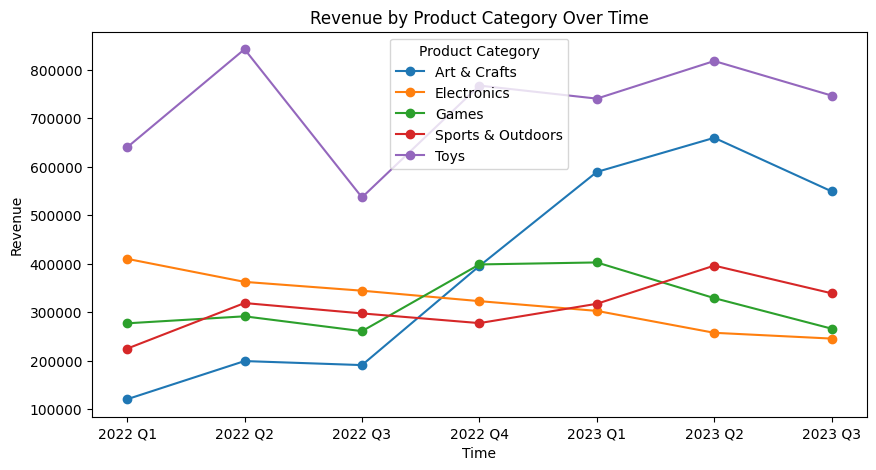

In [53]:
pivot_df.plot(kind='line', marker='o', figsize=(10, 5))

plt.title('Revenue by Product Category Over Time')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend(title='Product Category')
plt.show()